In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# VARIABILI
csvfile = 'csv/alldata.csv'
distance_param = 'CDistance'
gcolors = ['green', 'orange', 'red']
gbins = [2.0, 5.0, 7.0, 10.0]

# LETTURA DATI
tragitti = pd.read_csv(csvfile, index_col=False)

# PULIZIA DATI
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] < 13)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)

def clean(df):
    distance_cond = df[distance_param] > 0
    moovit_cond = df['Public'] > 12
    public_cond = df['Public'] > 0
    bike_cond = df['Bike'] > 0
    foot_cond = df['Foot'] > 0
    car_cond = df['Car'] > 0
    car2go_cond = df['Car2Go'] > 0
    enjoy_cond = df['Enjoy'] > 0
    coherence_cond = (df['Car'] <= df['Car2Go']) & (df['Car'] <= df['Enjoy'])
    cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond
    return cleaned

In [2]:
tragitti = tragitti[clean(tragitti)]

hour_length_freq = pd.crosstab(
    index=tragitti['Hour'],
    columns=pd.cut(tragitti[distance_param], bins=gbins))

hour_length_freq = hour_length_freq.reindex([7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0])
hour_length_freq

CDistance,"(2.0, 5.0]","(5.0, 7.0]","(7.0, 10.0]"
Hour,,,
7,2407,2001,965
8,2411,1934,1008
9,2343,2074,975
10,2356,2015,1046
11,2360,2018,1008
12,2451,1999,1065
13,2479,2020,1062
14,2490,2074,1037
15,2405,2108,1041


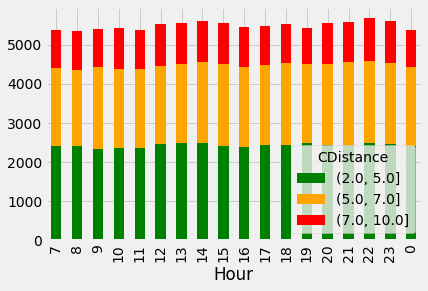

In [3]:
hour_length_freq.plot.bar(color=gcolors, stacked=True)
plt.show()

In [4]:
length_hour_freq = pd.crosstab(
    index=pd.cut(tragitti[distance_param], bins=gbins),
    columns='Abs. frequence')

(length_hour_freq / sum(length_hour_freq.values)) \
    .apply(lambda p: np.round(p, 4)*100) \
    .astype(str) \
    .apply(lambda s: s + '%')

col_0,Abs. frequence
CDistance,
"(2.0, 5.0]",44.19%
"(5.0, 7.0]",37.27%
"(7.0, 10.0]",18.53%


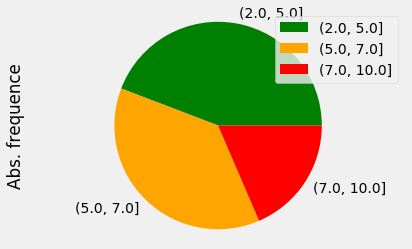

In [5]:
length_hour_freq.plot.pie('Abs. frequence', colors=gcolors)
plt.axis('equal')
plt.show()